In [3]:
import pandas as pd

train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(train_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
train_data['MSSubClass'].dtype

dtype('int64')

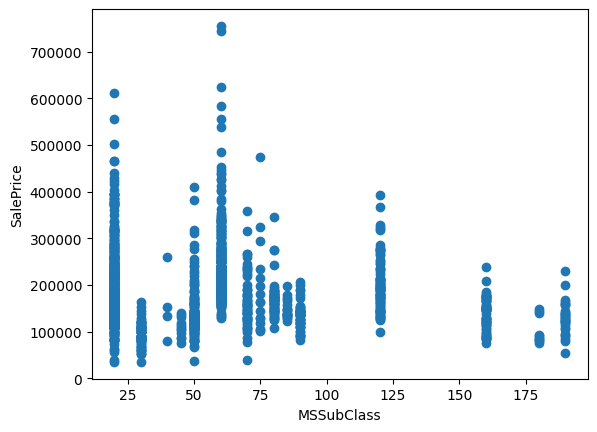

In [11]:
import matplotlib.pyplot as plt
plt.scatter(train_data['MSSubClass'], train_data['SalePrice'])
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
plt.show()

In [6]:
one_hot_subclass = train_data['MSSubClass']
hot_encoded_data = pd.get_dummies(one_hot_subclass,prefix=['MSSubClass'],dtype=float)
hot_encoded_data.head()

,['MSSubClass']_20,['MSSubClass']_30,['MSSubClass']_40,['MSSubClass']_45,['MSSubClass']_50,['MSSubClass']_60,['MSSubClass']_70,['MSSubClass']_75,['MSSubClass']_80,['MSSubClass']_85,['MSSubClass']_90,['MSSubClass']_120,['MSSubClass']_160,['MSSubClass']_180,['MSSubClass']_190
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
len(hot_encoded_data)

1460

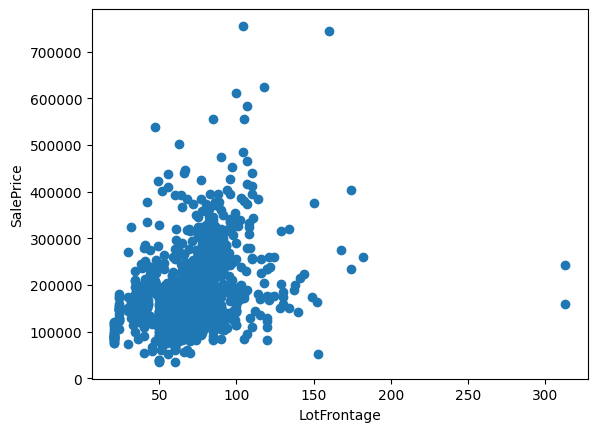

In [27]:
import matplotlib.pyplot as plt
plt.scatter(train_data['LotFrontage'], train_data['SalePrice'])
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.show()

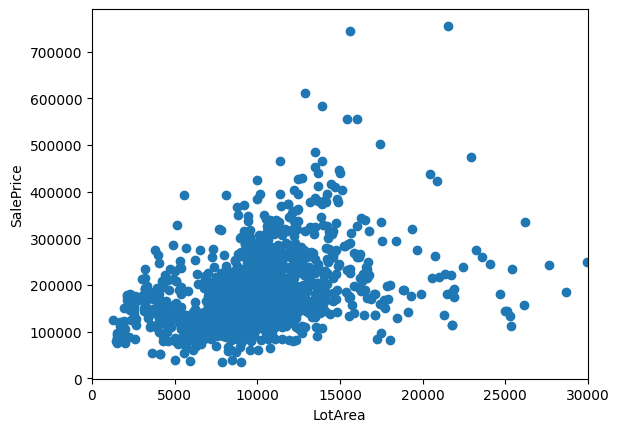

In [32]:
import matplotlib.pyplot as plt
#plt.scatter(train_data['LotArea'], train_data['SalePrice'])
fig, ax = plt.subplots()
ax.set_xlim(0, 30000)
#plt.set_xticks([0])
ax.scatter(train_data['LotArea'], train_data['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

In [7]:
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
lot_frontage = train_data['LotFrontage']
lot_area = train_data['LotArea']

lot_area.isna().sum()

print(lot_area)

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64


In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

lot_frontage_area = pd.DataFrame({'lot_frontage':lot_frontage,'lot_area':lot_area})

# Fit the StandardScaler object to the data
scaler.fit(lot_frontage_area)

# Transform the data using the StandardScaler object
X_normalized_lot_frontage_area = scaler.transform(lot_frontage_area)

# Print the normalized data
print(X_normalized_lot_frontage_area)
X_normalized_lot_frontage_area = pd.DataFrame(X_normalized_lot_frontage_area)

[[-0.22937175 -0.20714171]
 [ 0.4519361  -0.09188637]
 [-0.09311018  0.07347998]
 ...
 [-0.18395123 -0.14781027]
 [-0.09311018 -0.08016039]
 [ 0.22483348 -0.05811155]]


In [9]:
x_train = pd.concat([hot_encoded_data,X_normalized_lot_frontage_area],axis=1)

x_train.head()

,['MSSubClass']_20,['MSSubClass']_30,['MSSubClass']_40,['MSSubClass']_45,['MSSubClass']_50,['MSSubClass']_60,['MSSubClass']_70,['MSSubClass']_75,['MSSubClass']_80,['MSSubClass']_85,['MSSubClass']_90,['MSSubClass']_120,['MSSubClass']_160,['MSSubClass']_180,['MSSubClass']_190,0,1
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.229372,-0.207142
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.451936,-0.091886
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.093110,0.073480
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.456474,-0.096897
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.633618,0.375148


In [10]:
x_train = x_train.rename(columns={0: 'lot_frontage', 1: 'lot_area'})


In [13]:
#MAIN TRAINING DATAFRAME
x_train.head()

,['MSSubClass']_20,['MSSubClass']_30,['MSSubClass']_40,['MSSubClass']_45,['MSSubClass']_50,['MSSubClass']_60,['MSSubClass']_70,['MSSubClass']_75,['MSSubClass']_80,['MSSubClass']_85,['MSSubClass']_90,['MSSubClass']_120,['MSSubClass']_160,['MSSubClass']_180,['MSSubClass']_190,lot_frontage,lot_area
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.229372,-0.207142
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.451936,-0.091886
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.093110,0.073480
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.456474,-0.096897
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.633618,0.375148


0


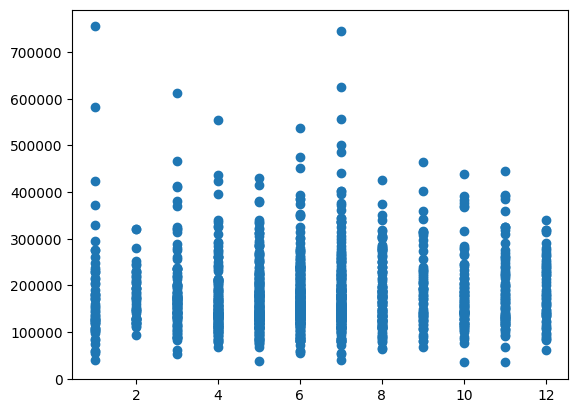

In [102]:
import matplotlib.pyplot as plt

# Create the x-axis and y-axis data
x = train_data['MoSold']
y = train_data['SalePrice']

print(y.isna().sum())

# Plot the bar graph
plt.scatter(x, y)

# Show the plot
plt.show()

In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

TotalBsmtSF = pd.DataFrame({'TotalBsmtSF':train_data['TotalBsmtSF']})

# Fit the StandardScaler object to the data
scaler.fit(TotalBsmtSF)

# Transform the data using the StandardScaler object
X_normalized_TotalBsmtSF = scaler.transform(TotalBsmtSF)

# Print the normalized data
print(X_normalized_TotalBsmtSF)
X_normalized_TotalBsmtSF = pd.DataFrame(X_normalized_TotalBsmtSF)

[[-0.45930254]
 [ 0.46646492]
 [-0.31336875]
 ...
 [ 0.21564122]
 [ 0.04690528]
 [ 0.45278362]]


In [69]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
over_qual = train_data['OverallQual']/10

over_qual.head()

0    0.7
1    0.6
2    0.7
3    0.7
4    0.8
Name: OverallQual, dtype: float64

In [16]:
YearRemodAdd = train_data['YearRemodAdd'].apply(lambda x: 1 if x > 1980 else 0)

YearRemodAdd.head()

0    1
1    0
2    1
3    0
4    1
Name: YearRemodAdd, dtype: int64

In [17]:
#MAIN TRAINING DATAFRAME


x_train = pd.concat([x_train,over_qual,YearRemodAdd,X_normalized_TotalBsmtSF],axis=1)
x_train.head()

,['MSSubClass']_20,['MSSubClass']_30,['MSSubClass']_40,['MSSubClass']_45,['MSSubClass']_50,['MSSubClass']_60,['MSSubClass']_70,['MSSubClass']_75,['MSSubClass']_80,['MSSubClass']_85,['MSSubClass']_90,['MSSubClass']_120,['MSSubClass']_160,['MSSubClass']_180,['MSSubClass']_190,lot_frontage,lot_area,OverallQual,YearRemodAdd,0
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.229372,-0.207142,0.7,1,-0.459303
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.451936,-0.091886,0.6,0,0.466465
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.093110,0.073480,0.7,1,-0.313369
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.456474,-0.096897,0.7,0,-0.687324
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.633618,0.375148,0.8,1,0.199680


In [85]:
x_train = x_train.drop(['OverallQual'],axis=1)

In [96]:
#MAIN TRAINING DATAFRAME
#latest

x_train = pd.concat([x_train,X_normalized_TotalBsmtSF],axis=1)
x_train.head()

,['MSSubClass']_20,['MSSubClass']_30,['MSSubClass']_40,['MSSubClass']_45,['MSSubClass']_50,['MSSubClass']_60,['MSSubClass']_70,['MSSubClass']_75,['MSSubClass']_80,['MSSubClass']_85,['MSSubClass']_90,['MSSubClass']_120,['MSSubClass']_160,['MSSubClass']_180,['MSSubClass']_190,lot_frontage,lot_area,YearRemodAdd,OverallQual,0
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.229372,-0.207142,1,0.7,-0.459303
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.451936,-0.091886,0,0.6,0.466465
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.093110,0.073480,1,0.7,-0.313369
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.456474,-0.096897,0,0.7,-0.687324
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.633618,0.375148,1,0.8,0.199680


In [18]:
x_train = x_train.rename(columns={0:'BasementSF'})

In [19]:
x_train.head()

,['MSSubClass']_20,['MSSubClass']_30,['MSSubClass']_40,['MSSubClass']_45,['MSSubClass']_50,['MSSubClass']_60,['MSSubClass']_70,['MSSubClass']_75,['MSSubClass']_80,['MSSubClass']_85,['MSSubClass']_90,['MSSubClass']_120,['MSSubClass']_160,['MSSubClass']_180,['MSSubClass']_190,lot_frontage,lot_area,OverallQual,YearRemodAdd,BasementSF
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.229372,-0.207142,0.7,1,-0.459303
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.451936,-0.091886,0.6,0,0.466465
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.093110,0.073480,0.7,1,-0.313369
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.456474,-0.096897,0.7,0,-0.687324
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.633618,0.375148,0.8,1,0.199680


In [21]:
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

x_test = test_data[['MSSubClass','LotFrontage','LotArea','TotalBsmtSF','YearRemodAdd','OverallQual']]

x_test.head()

,MSSubClass,LotFrontage,LotArea,TotalBsmtSF,YearRemodAdd,OverallQual
0,20,80.0,11622,882.0,1961,5
1,20,81.0,14267,1329.0,1958,6
2,60,74.0,13830,928.0,1998,5
3,60,78.0,9978,926.0,1998,6
4,120,43.0,5005,1280.0,1992,8


In [22]:
one_hot_subclass = x_test['MSSubClass']
hot_encoded_data = pd.get_dummies(one_hot_subclass,prefix=['MSSubClass'],dtype=float)
hot_encoded_data = hot_encoded_data.drop(['[\'MSSubClass\']_150'],axis=1)
hot_encoded_data.head()


,['MSSubClass']_20,['MSSubClass']_30,['MSSubClass']_40,['MSSubClass']_45,['MSSubClass']_50,['MSSubClass']_60,['MSSubClass']_70,['MSSubClass']_75,['MSSubClass']_80,['MSSubClass']_85,['MSSubClass']_90,['MSSubClass']_120,['MSSubClass']_160,['MSSubClass']_180,['MSSubClass']_190
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
x_test['LotFrontage'] = x_test['LotFrontage'].fillna(x_test['LotFrontage'].mean())
x_test['LotArea'] = x_test['LotArea'].fillna(x_test['LotArea'].mean())
lot_frontage = x_test['LotFrontage']
lot_area = x_test['LotArea']

print(lot_frontage.isna().sum())



0


/tmp/ipykernel_2933/3225816766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['LotFrontage'] = x_test['LotFrontage'].fillna(x_test['LotFrontage'].mean())
/tmp/ipykernel_2933/3225816766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['LotArea'] = x_test['LotArea'].fillna(x_test['LotArea'].mean())


In [25]:
TotalBsmtSF = x_test['TotalBsmtSF']

In [26]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

lot_frontage_area = pd.DataFrame({'lot_frontage':lot_frontage,'lot_area':lot_area,'BasementSF':TotalBsmtSF})

# Fit the StandardScaler object to the data
scaler.fit(lot_frontage_area)

# Transform the data using the StandardScaler object
X_normalized_lot_frontage_area = scaler.transform(lot_frontage_area)

# Print the normalized data
print(X_normalized_lot_frontage_area)
X_normalized_lot_frontage_area = pd.DataFrame(X_normalized_lot_frontage_area)

[[ 0.55558736  0.36392912 -0.3706814 ]
 [ 0.60423927  0.89786065  0.6389252 ]
 [ 0.26367594  0.80964587 -0.26678452]
 ...
 [ 4.44773966  2.05514965  0.40176929]
 [-0.3201469   0.12552719 -0.30292257]
 [ 0.26367594 -0.03879049 -0.11319784]]


In [28]:
YearRemodAdd = x_test['YearRemodAdd'].apply(lambda x: 1 if x > 1980 else 0)
over_qual = x_test['OverallQual']/10

In [29]:

x_test_final = pd.concat([hot_encoded_data,YearRemodAdd,over_qual],axis=1)
x_test_final.head()

,['MSSubClass']_20,['MSSubClass']_30,['MSSubClass']_40,['MSSubClass']_45,['MSSubClass']_50,['MSSubClass']_60,['MSSubClass']_70,['MSSubClass']_75,['MSSubClass']_80,['MSSubClass']_85,['MSSubClass']_90,['MSSubClass']_120,['MSSubClass']_160,['MSSubClass']_180,['MSSubClass']_190,YearRemodAdd,OverallQual
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.5
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.6
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.5
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.6
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.8


In [30]:

x_test_final = pd.concat([x_test_final,X_normalized_lot_frontage_area],axis=1)
x_test_final.head()

,['MSSubClass']_20,['MSSubClass']_30,['MSSubClass']_40,['MSSubClass']_45,['MSSubClass']_50,['MSSubClass']_60,['MSSubClass']_70,['MSSubClass']_75,['MSSubClass']_80,['MSSubClass']_85,['MSSubClass']_90,['MSSubClass']_120,['MSSubClass']_160,['MSSubClass']_180,['MSSubClass']_190,YearRemodAdd,OverallQual,0,1,2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.5,0.555587,0.363929,-0.370681
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.6,0.604239,0.897861,0.638925
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.5,0.263676,0.809646,-0.266785
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.6,0.458284,0.032064,-0.271302
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.8,-1.244533,-0.971808,0.528252


In [31]:
x_test_final = x_test_final.rename(columns={0:'lot_frontage',1:'lot_area',2:'BasementSF'})

In [32]:
x_train.head()

,['MSSubClass']_20,['MSSubClass']_30,['MSSubClass']_40,['MSSubClass']_45,['MSSubClass']_50,['MSSubClass']_60,['MSSubClass']_70,['MSSubClass']_75,['MSSubClass']_80,['MSSubClass']_85,['MSSubClass']_90,['MSSubClass']_120,['MSSubClass']_160,['MSSubClass']_180,['MSSubClass']_190,lot_frontage,lot_area,OverallQual,YearRemodAdd,BasementSF
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.229372,-0.207142,0.7,1,-0.459303
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.451936,-0.091886,0.6,0,0.466465
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.093110,0.073480,0.7,1,-0.313369
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.456474,-0.096897,0.7,0,-0.687324
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.633618,0.375148,0.8,1,0.199680


In [56]:
x_test_final.head()

,['MSSubClass']_20,['MSSubClass']_30,['MSSubClass']_40,['MSSubClass']_45,['MSSubClass']_50,['MSSubClass']_60,['MSSubClass']_70,['MSSubClass']_75,['MSSubClass']_80,['MSSubClass']_85,['MSSubClass']_90,['MSSubClass']_120,['MSSubClass']_160,['MSSubClass']_180,['MSSubClass']_190,YearRemodAdd,OverallQual,lot_frontage,lot_area,BasementSF
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.5,0.555587,0.363929,-0.370681
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.6,0.604239,0.897861,0.638925
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.5,0.263676,0.809646,-0.266785
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.6,0.458284,0.032064,-0.271302
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.8,-1.244533,-0.971808,0.528252


In [124]:
len(x_test_final)

1459

In [68]:
#copys
copy_x_train = x_train
copy_y_train = train_y
copy_x_test_final = x_test_final

copy_x_test_final.head()

,['MSSubClass']_20,['MSSubClass']_30,['MSSubClass']_40,['MSSubClass']_45,['MSSubClass']_50,['MSSubClass']_60,['MSSubClass']_70,['MSSubClass']_75,['MSSubClass']_80,['MSSubClass']_85,...,['MSSubClass']_160,['MSSubClass']_180,['MSSubClass']_190,YearRemodAdd,OverallQual,lot_frontage,lot_area,BasementSF,\tlot_frontage,\tlot_area
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.5,0.555587,0.363929,-0.370681,0.555587,0.363929
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.6,0.604239,0.897861,0.638925,0.604239,0.897861
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0.5,0.263676,0.809646,-0.266785,0.263676,0.809646
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0.6,0.458284,0.032064,-0.271302,0.458284,0.032064
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0.8,-1.244533,-0.971808,0.528252,-1.244533,-0.971808


In [69]:
copy_x_test_final = copy_x_test_final.drop(['\tlot_frontage','\tlot_area'],axis=1)

In [35]:
train_y = train_data['SalePrice']
train_y.head()
len(train_y)

1460

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(2)

x_poly = poly.fit_transform(copy_x_train)

poly.fit(x_poly, copy_y_train)

lin = LinearRegression()

lin.fit(x_poly, copy_y_train)




LinearRegression()

In [71]:
copy_x_test_final['YearRemodAdd']=copy_x_test_final['YearRemodAdd'].fillna(copy_x_test_final['YearRemodAdd'].mean())

In [72]:
copy_x_test_final['OverallQual']=copy_x_test_final['OverallQual'].fillna(copy_x_test_final['OverallQual'].mean())

In [73]:
copy_x_test_final['lot_frontage']=copy_x_test_final['lot_frontage'].fillna(copy_x_test_final['lot_frontage'].mean())

In [74]:
copy_x_test_final['lot_area']=copy_x_test_final['lot_area'].fillna(copy_x_test_final['lot_area'].mean())

In [75]:
copy_x_test_final['BasementSF']=copy_x_test_final['BasementSF'].fillna(copy_x_test_final['BasementSF'].mean())

In [76]:
ans = lin.predict(poly.fit_transform(copy_x_test_final))

In [82]:
copy_x_test_final = copy_x_test_final.sort_index(axis=1, ascending=True)
copy_x_train = copy_x_train.sort_index(axis=1 , ascending=True)

In [95]:

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1000)
ridge_reg.fit(copy_x_train, copy_y_train)

ans = ridge_reg.predict(copy_x_test_final)

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=10)
reg.fit(copy_x_train, copy_y_train)

ans = reg.predict(copy_x_test_final)

In [109]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=10.0, epsilon=0.01))
regr.fit(copy_x_train, copy_y_train)

ans = regr.predict(copy_x_test_final)

In [107]:
len(ans)

1459

In [110]:
import pandas as pd
import numpy as np

np_array = np.array(ans)
df = pd.DataFrame(np_array)
df.index = np.arange(1461, 1461 + len(df))

df.to_csv('my_csv_file9.csv', index=True)